In [16]:
import numpy as np 
import string
import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import networkx as nx

[nltk_data] Downloading package punkt to /home/darkness/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/darkness/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/darkness/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/darkness/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pre Processing

### Text Retrival

In [17]:
f = open("Text.txt")
data = f.readlines()[6:]
f.close()

In [18]:
data

['--\n',
 '115\n',
 'Listen\n',
 'Share\n',
 'The tech industry is extremely dynamic and the only constant is change. Companies that once appeared to be invulnerable can be regularly upset by upstarts unless they adapt. We can see this in the difference in fortunes between Microsoft and Intel which both saw the PC displaced by mobile devices. Microsoft adapted by pivoting to the cloud while Intel’s fortunes have declined as ARM, TSMC and Nvidia are ascendant..\n',
 'Google is facing similar potential disruption in its core search business due to the rise of answer engines like Perplexity, ChatGPT and Microsoft’s Copilot. The media narrative has turned against Google, especially towards its CEO Sundar Pichai, with articles with titles like Alphabet Needs Its Own Mark Zuckerberg and Alphabet Faces ‘Clear and Present Danger’ of Falling Short in AI being published almost daily.\n',
 'However this negativity seems somewhat extreme in comparison to the facts. ChatGPT’s growth on the web has 

### Tokenization

In [19]:
# Sentence Splitting
sentences = []
for i in data:
    sentences += nltk.sent_tokenize(i)
# Word Splitting
words_in_sentence = []
for i in sentences:

    words_in_sentence.append(nltk.word_tokenize(i))

In [20]:
print(words_in_sentence)

[['--'], ['115'], ['Listen'], ['Share'], ['The', 'tech', 'industry', 'is', 'extremely', 'dynamic', 'and', 'the', 'only', 'constant', 'is', 'change', '.'], ['Companies', 'that', 'once', 'appeared', 'to', 'be', 'invulnerable', 'can', 'be', 'regularly', 'upset', 'by', 'upstarts', 'unless', 'they', 'adapt', '.'], ['We', 'can', 'see', 'this', 'in', 'the', 'difference', 'in', 'fortunes', 'between', 'Microsoft', 'and', 'Intel', 'which', 'both', 'saw', 'the', 'PC', 'displaced', 'by', 'mobile', 'devices', '.'], ['Microsoft', 'adapted', 'by', 'pivoting', 'to', 'the', 'cloud', 'while', 'Intel', '’', 's', 'fortunes', 'have', 'declined', 'as', 'ARM', ',', 'TSMC', 'and', 'Nvidia', 'are', 'ascendant', '..'], ['Google', 'is', 'facing', 'similar', 'potential', 'disruption', 'in', 'its', 'core', 'search', 'business', 'due', 'to', 'the', 'rise', 'of', 'answer', 'engines', 'like', 'Perplexity', ',', 'ChatGPT', 'and', 'Microsoft', '’', 's', 'Copilot', '.'], ['The', 'media', 'narrative', 'has', 'turned', 'a

In [21]:
# apostrophy =  ':--”“‘—'

In [22]:
words_in_sentence = [[i for i in j if i not in ( string.punctuation ) ] for j in words_in_sentence]
words_in_sentence = [[ i for i in j] for j in words_in_sentence]

In [23]:
print(words_in_sentence)

[['--'], ['115'], ['Listen'], ['Share'], ['The', 'tech', 'industry', 'is', 'extremely', 'dynamic', 'and', 'the', 'only', 'constant', 'is', 'change'], ['Companies', 'that', 'once', 'appeared', 'to', 'be', 'invulnerable', 'can', 'be', 'regularly', 'upset', 'by', 'upstarts', 'unless', 'they', 'adapt'], ['We', 'can', 'see', 'this', 'in', 'the', 'difference', 'in', 'fortunes', 'between', 'Microsoft', 'and', 'Intel', 'which', 'both', 'saw', 'the', 'PC', 'displaced', 'by', 'mobile', 'devices'], ['Microsoft', 'adapted', 'by', 'pivoting', 'to', 'the', 'cloud', 'while', 'Intel', '’', 's', 'fortunes', 'have', 'declined', 'as', 'ARM', 'TSMC', 'and', 'Nvidia', 'are', 'ascendant', '..'], ['Google', 'is', 'facing', 'similar', 'potential', 'disruption', 'in', 'its', 'core', 'search', 'business', 'due', 'to', 'the', 'rise', 'of', 'answer', 'engines', 'like', 'Perplexity', 'ChatGPT', 'and', 'Microsoft', '’', 's', 'Copilot'], ['The', 'media', 'narrative', 'has', 'turned', 'against', 'Google', 'especially

In [24]:
Stop_word = stopwords.words('english') + list(string.ascii_lowercase) + list(string.ascii_uppercase)

words_nostop_in_sentence = []
for i in words_in_sentence:
    temp = [word for word in i if word not in Stop_word]
    words_nostop_in_sentence.append(temp)
print(words_nostop_in_sentence)

[['--'], ['115'], ['Listen'], ['Share'], ['The', 'tech', 'industry', 'extremely', 'dynamic', 'constant', 'change'], ['Companies', 'appeared', 'invulnerable', 'regularly', 'upset', 'upstarts', 'unless', 'adapt'], ['We', 'see', 'difference', 'fortunes', 'Microsoft', 'Intel', 'saw', 'PC', 'displaced', 'mobile', 'devices'], ['Microsoft', 'adapted', 'pivoting', 'cloud', 'Intel', '’', 'fortunes', 'declined', 'ARM', 'TSMC', 'Nvidia', 'ascendant', '..'], ['Google', 'facing', 'similar', 'potential', 'disruption', 'core', 'search', 'business', 'due', 'rise', 'answer', 'engines', 'like', 'Perplexity', 'ChatGPT', 'Microsoft', '’', 'Copilot'], ['The', 'media', 'narrative', 'turned', 'Google', 'especially', 'towards', 'CEO', 'Sundar', 'Pichai', 'articles', 'titles', 'like', 'Alphabet', 'Needs', 'Its', 'Own', 'Mark', 'Zuckerberg', 'Alphabet', 'Faces', '‘', 'Clear', 'Present', 'Danger', '’', 'Falling', 'Short', 'AI', 'published', 'almost', 'daily'], ['However', 'negativity', 'seems', 'somewhat', 'extr

### POS Tagging

In [25]:
POS = []
for i in words_nostop_in_sentence:
    POS.append(nltk.pos_tag(i))

print(POS)

[[('--', ':')], [('115', 'CD')], [('Listen', 'VB')], [('Share', 'NN')], [('The', 'DT'), ('tech', 'NN'), ('industry', 'NN'), ('extremely', 'RB'), ('dynamic', 'JJ'), ('constant', 'JJ'), ('change', 'NN')], [('Companies', 'NNS'), ('appeared', 'VBD'), ('invulnerable', 'JJ'), ('regularly', 'RB'), ('upset', 'JJ'), ('upstarts', 'NNS'), ('unless', 'IN'), ('adapt', 'NN')], [('We', 'PRP'), ('see', 'VBP'), ('difference', 'NN'), ('fortunes', 'NNS'), ('Microsoft', 'NNP'), ('Intel', 'NNP'), ('saw', 'VBD'), ('PC', 'NNP'), ('displaced', 'VBD'), ('mobile', 'JJ'), ('devices', 'NNS')], [('Microsoft', 'NNP'), ('adapted', 'VBD'), ('pivoting', 'VBG'), ('cloud', 'JJ'), ('Intel', 'NNP'), ('’', 'NNP'), ('fortunes', 'NNS'), ('declined', 'VBD'), ('ARM', 'NNP'), ('TSMC', 'NNP'), ('Nvidia', 'NNP'), ('ascendant', 'NN'), ('..', 'NN')], [('Google', 'NNP'), ('facing', 'VBG'), ('similar', 'JJ'), ('potential', 'JJ'), ('disruption', 'NN'), ('core', 'NN'), ('search', 'NN'), ('business', 'NN'), ('due', 'JJ'), ('rise', 'NN')

### Lemmatization

In [26]:
root_per_sentence = []
obj = nltk.WordNetLemmatizer()

for i in words_nostop_in_sentence:
    temp  = [obj.lemmatize(j) for j in i ] 
    root_per_sentence.append(temp)
print(root_per_sentence)

[['--'], ['115'], ['Listen'], ['Share'], ['The', 'tech', 'industry', 'extremely', 'dynamic', 'constant', 'change'], ['Companies', 'appeared', 'invulnerable', 'regularly', 'upset', 'upstart', 'unless', 'adapt'], ['We', 'see', 'difference', 'fortune', 'Microsoft', 'Intel', 'saw', 'PC', 'displaced', 'mobile', 'device'], ['Microsoft', 'adapted', 'pivoting', 'cloud', 'Intel', '’', 'fortune', 'declined', 'ARM', 'TSMC', 'Nvidia', 'ascendant', '..'], ['Google', 'facing', 'similar', 'potential', 'disruption', 'core', 'search', 'business', 'due', 'rise', 'answer', 'engine', 'like', 'Perplexity', 'ChatGPT', 'Microsoft', '’', 'Copilot'], ['The', 'medium', 'narrative', 'turned', 'Google', 'especially', 'towards', 'CEO', 'Sundar', 'Pichai', 'article', 'title', 'like', 'Alphabet', 'Needs', 'Its', 'Own', 'Mark', 'Zuckerberg', 'Alphabet', 'Faces', '‘', 'Clear', 'Present', 'Danger', '’', 'Falling', 'Short', 'AI', 'published', 'almost', 'daily'], ['However', 'negativity', 'seems', 'somewhat', 'extreme', 

## TF -IDF VECTOR REPRESENTATION

In [27]:
unique_words = []
for i in root_per_sentence:
    for j in i :
        if j not in unique_words:
            unique_words.append(j)
unique_words = sorted(unique_words)

In [28]:
tf = []
idf = [0 for _ in range(len(unique_words))]
for i in range(len(root_per_sentence)):
    temp = [0 for _ in range(len(unique_words))]
    for j in root_per_sentence[i]:
        temp[unique_words.index(j)] = 1 / len(root_per_sentence[i])
        idf[unique_words.index(j)] += 1
    tf.append(temp) 

tf = np.array(tf)
idf = np.array(idf)
idf = np.array(np.log2(len(root_per_sentence))) - np.log2(idf)
idf = idf.reshape(1,-1)

In [29]:
# TF - IDF Vectorization
import pandas as pd
Data_TF_IDF = pd.DataFrame(index=["sentence-" + str(i+1) for i in range(len(root_per_sentence) )],columns=sorted(unique_words),data=tf)

In [30]:
vector_sentence1 = (np.array(Data_TF_IDF.loc['sentence-1']).reshape(1,-1) * idf)
vector_sentence2 = (np.array(Data_TF_IDF.loc['sentence-2']).reshape(1,-1) * idf)

In [31]:
def mag(vct):
    return np.sum(vct**2)

In [32]:
Sim_tf_idf = np.dot(vector_sentence1,vector_sentence2.T) / (mag(vector_sentence1) * mag(vector_sentence2))

### Similarity score(sent1,sent2) is 0.010788134718958942

## Bag of Words

In [33]:
tf_bow = []
for i in range(len(root_per_sentence)):
    temp = [0 for _ in range(len(unique_words))]
    for j in root_per_sentence[i]:
        temp[unique_words.index(j)] = 1 
    tf_bow.append(temp) 
tf_bow = np.array(tf_bow)

In [34]:
Data_bow = pd.DataFrame(index=["sentence-" + str(i+1) for i in range(len(root_per_sentence) )],columns=sorted(unique_words),data=tf_bow)

In [35]:
vector_sentence1_bow = (np.array(Data_bow.loc['sentence-1']).reshape(1,-1) )
vector_sentence2_bow = (np.array(Data_bow.loc['sentence-2']).reshape(1,-1) )
Sim_bow =  np.dot(vector_sentence1_bow,vector_sentence2_bow.T) / (mag(vector_sentence1_bow) * mag(vector_sentence2_bow))

### Similarity score(sent1,sent2)  0.005208333333333333

## WORD2VEC(CBOW)

In [36]:
from gensim.models import Word2Vec

model = Word2Vec(root_per_sentence,min_count=1,vector_size=150,window=5,workers=5,epochs=100,sg=1)

In [37]:
Vector_sentence = [model.wv[root_per_sentence[i]].sum(axis=0).reshape(1,150) for i in range(len(root_per_sentence))]

In [38]:
Sim_word2vec = np.dot(Vector_sentence[0],Vector_sentence[1].T) / ((mag(Vector_sentence[0])) * mag(Vector_sentence[1]))

In [39]:
def Sim(i,j):
    return (np.dot(Vector_sentence[i],Vector_sentence[j].T) / ((mag(Vector_sentence[i])) * mag(Vector_sentence[j])))

### Similarity score(sent1,sent2) is 0.0013258324

In [40]:
def ft_vector_similarity(v1,v2):
    return (np.dot(v1,v2.T) / ((mag(v1) * mag(v2))))[0][0]

### FASTTEXT

In [41]:
from gensim.models import FastText
fmodel = FastText(sentences=root_per_sentence,min_count=1,vector_size=150,window=5,workers=5,epochs=100)
ft_vectors = [fmodel.wv[root_per_sentence[i]].sum(axis = 0).reshape(1,150) for i in range(len(root_per_sentence))]

In [42]:
MAT1 = np.array([[ft_vector_similarity(ft_vectors[j],ft_vectors[i]) if i!=j else 0 for i in range(len(ft_vectors))] for j in range(len(ft_vectors))])

In [43]:
def text_similarity(root_s1,root_s2,s1,s2):
    common_words = []
    
    for word in root_s1:
        if word in root_s2:
            common_words.append(word)
    similarity_score = len(common_words)/(np.log(len(s1)) + (np.log(len(s2))))
    return similarity_score

In [44]:
MAT2 = np.array([[text_similarity(root_per_sentence[i],root_per_sentence[j],words_in_sentence[i],words_in_sentence[j]) if i!=j else 0 for i in range(len(sentences))] for j in range(len(sentences))])

/tmp/ipykernel_14680/1727373012.py:7: RuntimeWarning: invalid value encountered in double_scalars
  similarity_score = len(common_words)/(np.log(len(s1)) + (np.log(len(s2))))
/tmp/ipykernel_14680/1727373012.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  similarity_score = len(common_words)/(np.log(len(s1)) + (np.log(len(s2))))


In [45]:
G = MAT1 + MAT2

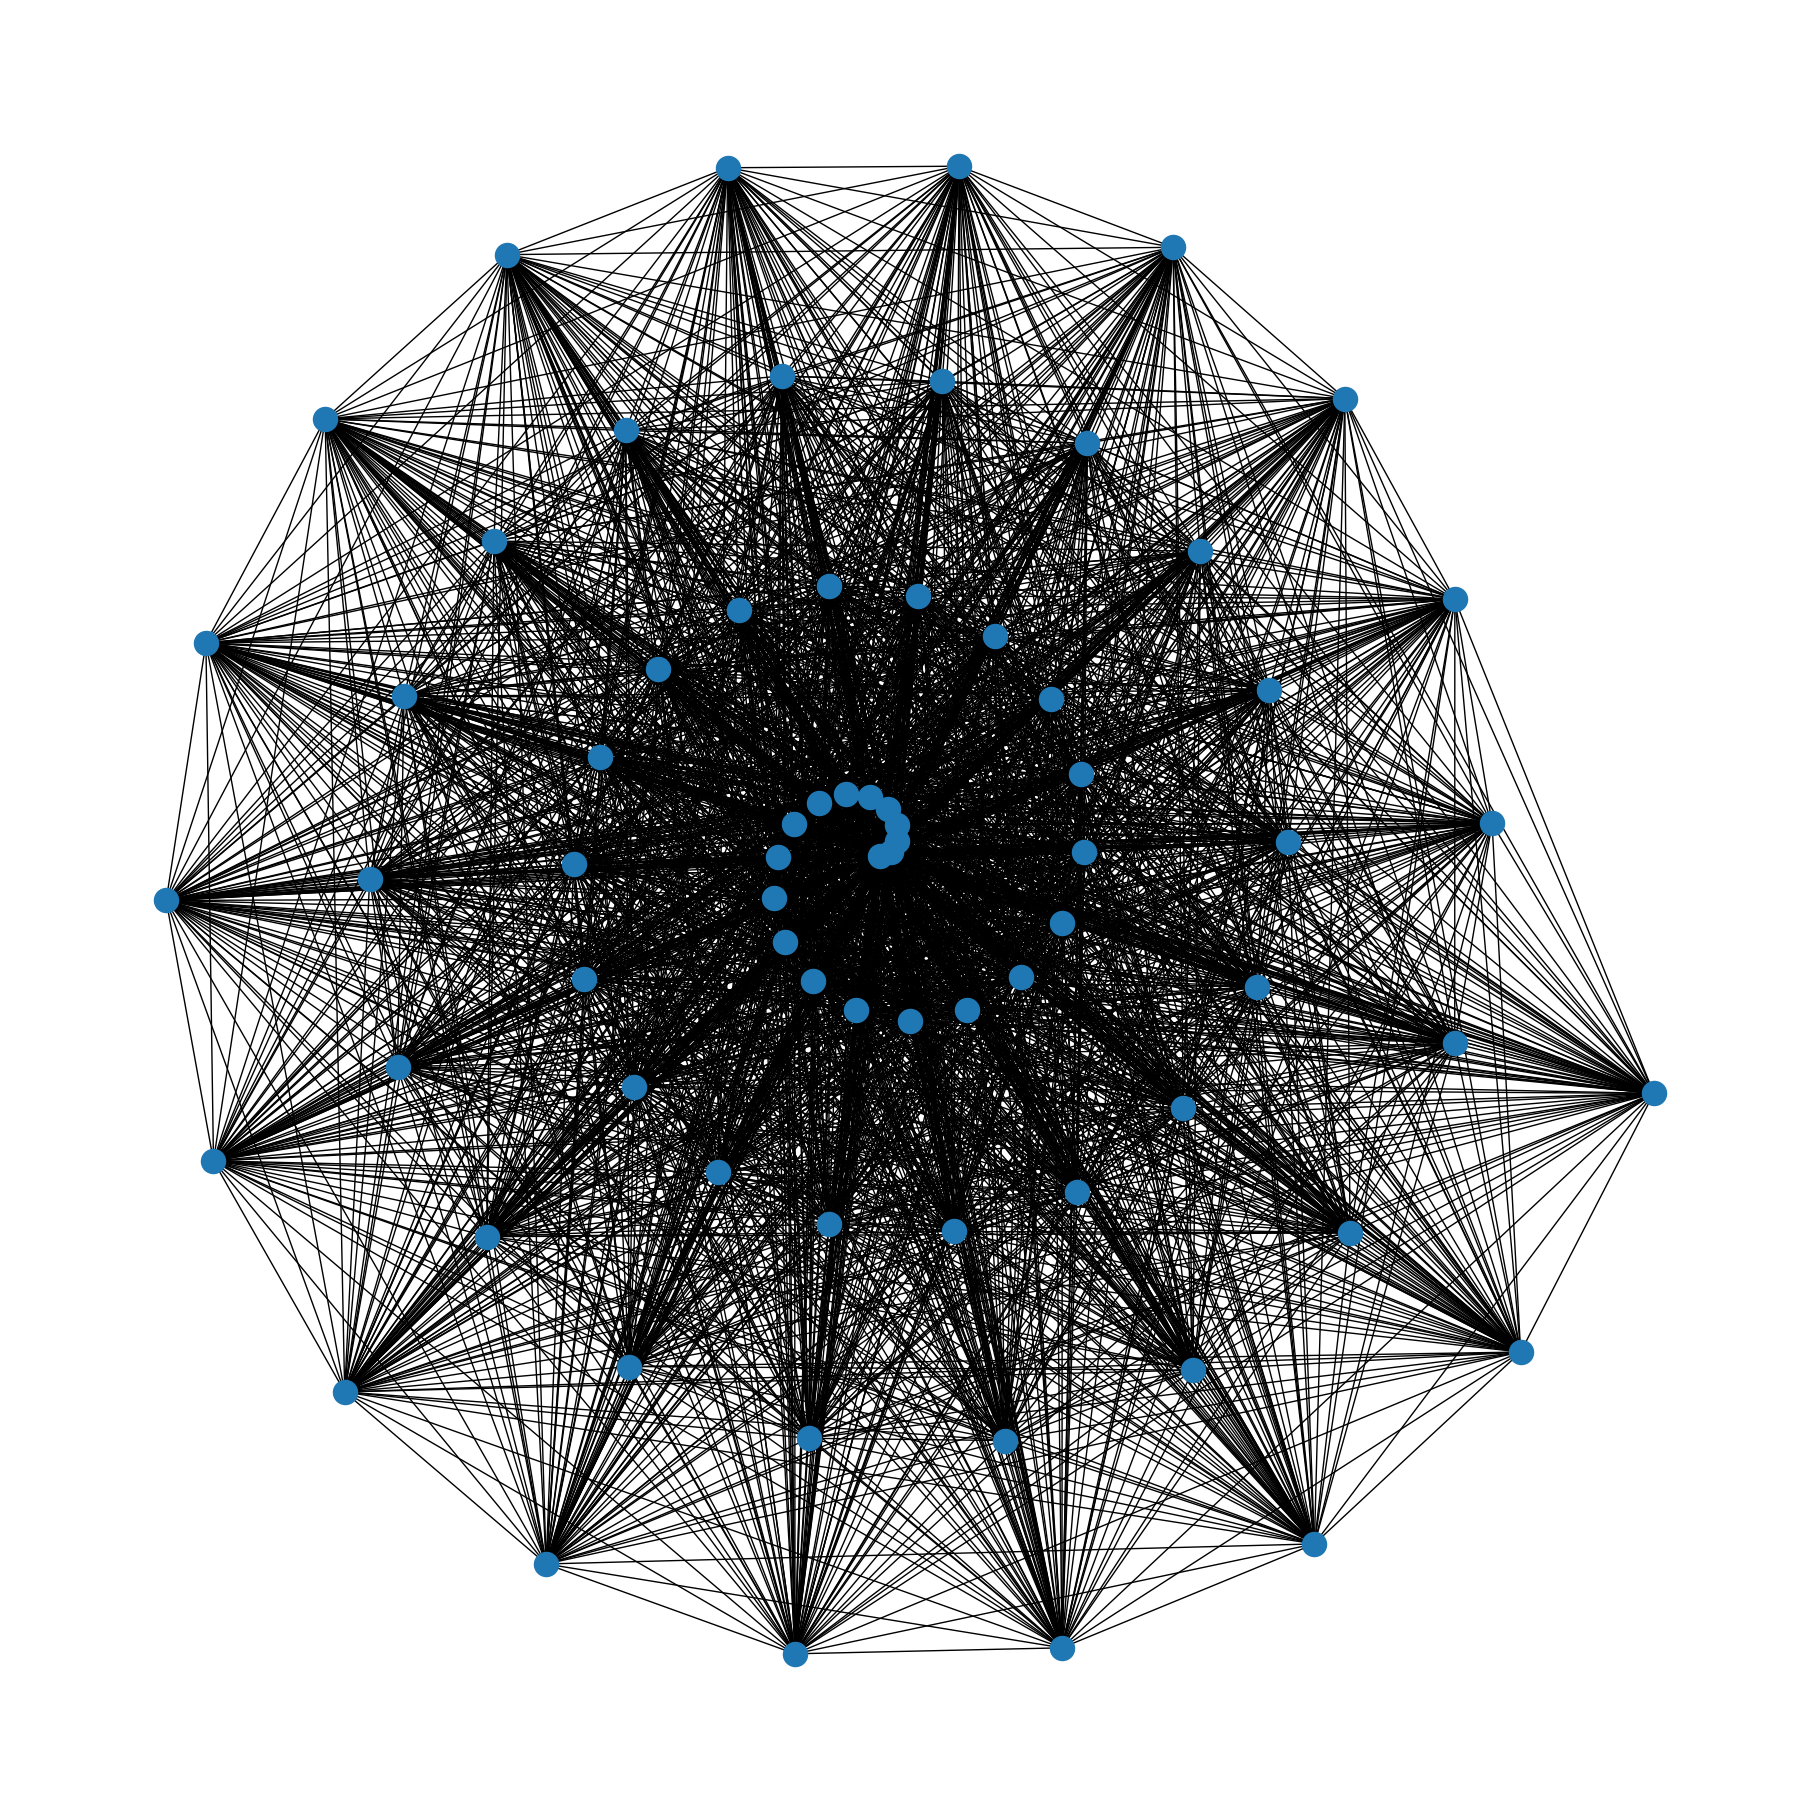

In [46]:
Graph = nx.from_numpy_array(G,create_using=nx.MultiGraph())
plt.figure(figsize=(18,18))
pos = nx.spiral_layout(Graph)
nx.draw(Graph,pos)
plt.show()

In [50]:
pg = sorted(nx.pagerank(Graph).items(),key= lambda x : x[1],reverse=True)
sent = [i[0] for i in pg[:15]]

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

In [ ]:
for i in sent:
    print(sentences[i])

From there on it’s an orgy.”
That would be boring.
Major spoilers for Saltburn follow.
They’re the rich seigneurs of the island.
The juxtaposition between the angel (or is it Icarus?)
They love being surrounded by pretty women.
But what if the symbolism of the Minotaur is actually inverted?
They in turn sacrifice themselves for him — Oliver does not.
The figure of the Minotaur cannot be neatly categorized.
Saltburn is by no means perfect but it captures one’s interest.
Like the Minotaur, Oliver has an animal element that rules over him.
He is therefore not bound by the norms of the audience.
Picasso’s interpretation of the Minotaur also lends support to this analysis.
Oliver is undoubtedly likened to the Minotaur who had an insatiable hunger for human flesh.
These features are what make Saltburn a good film.


## END